<a href="https://colab.research.google.com/github/jisazac/pythonfinanzaseafit/blob/master/Clase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado Python para Finanzas</h1>




<p><a name="contents"></a></p>

# Contenido Clase 5


- <a href="#var">1. Value at Risk</a><br>
- <a href="#backtesting">2. BackTesting Estrategias de Trading</a><br>
- <a href="#interes">3. Modelos de Tasas de Interés</a><br>
- <a href="#risk">4. Riesgo de Concentración de Posiciones</a><br>
- <a href="#beta">4. Beta Hedging</a><br>



<p><a name="var"></a></p>

# 1.0 Value at Risk (VaR)
[[Contenidos]](#contents)

Tambien conocido como valor en riesgo es una medida de riesgo  equivalente  a la **miníma** pérdida  posible  en cierto porcentaje del tiempo a lo largo de un periodo de tiempo,  dadas unas condiciones de mercado asumidas.  Veamos este ejemplo para aclarar el concepto:


*El VaR de 5% de un portafolio es $2.2 millones para un periodo día a día*

Los siguientes puntos son importantes para entender el VaR:

* El VaR puede ser medido tanto en un unidades monetarias como en términos porcentuales.

* El VaR es un pérdida minima. A veces suele decirse que el VaR es la máxima pérdida posible, lo cual es errado ya que lo máximo que puedo perder es el portafolio completo.

* El VaR hace referencia a un horizonte de tiempo, se espera que las pérdidas ocurran  a lo largo de un período de tiempo dado.


Otra forma de expresar el VaR sería:

*5% de las veces las pérdidas van a ser al menos $2.2 millones*

<p><img alt="comparison  logo" width="450" height="280" src="https://www.bmeclearing.es/images/imgsSubidas/Gestion-Riesgo/Hvar_eng.png"
" align="center" hspace="10px" vspace="0px"></p>

Matemáticamente podemos enunciarlo como

$P(R_{t} \leq VaR_{\alpha})=\alpha$

$VaR_{\alpha}=Cuantil_{a}(R_{t})$

### Ejercicio 1

Dado un VaR de 25 millones al 5% para un mes, cual de las siguientes afirmaciones es correcta:

1. Hay un 5% de probabilidad perder 25 millone en un mes.

2. La minima pérdida que podría ocurrir en un mes 5% de las veces es 25 millones.

3. Hay un 95% de probabilidad que el valor esperado de la pérdida durante un mes sea menor a 25 millones.




De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

La respuesta correcta es (2). (1) es incorrecta porque el VaR no da la probabilidad de perder una cifra específica. (3) Es incorrecto porque el VaR no es un valor "esperado" (promedio) sino una pérdida mínima   

--->

### 1.1. Ventajas del VaR

- Concepto Simple
- Fácil de comunicar
- Permite hacer comparaciones de riesgo
- Ampliamente aceptado por reguladores.

### 1.2. Limitaciones del VaR

- Subestima la frecuencia de eventos extremos
- No toma en cuenta la liquidez del portafolio (la iliquidez puede exacerbar las pérdidas)
- Vulnerable a regímenes de volatilidad
- Malentendidos: El VaR no es una medida de peor escenario, las pérdidas pueden exceder el VaR.

### 1.3. Estimación paramétrica del VaR (método varianza-covarianza) 

También conocido como el método analítico comienza con una descomposición de riesgo de los componentes del portafolio. Típicamente asume la distribución normal. Solo requiere como insumos:

- El retorno esperado de los componentes
- La desviación estandar de cada componente.

Para lograrlo usaremos el concepto de distribución normal estándar $z$. Si tenemos un serie de retornos $R$ podemos convertirla a su distribución $z$ equivalente con la transformación:

$$ z=\frac{R-\mu}{\sigma}$$

Así, la fórmula en forma cerrada del VaR Normal sería:

$$VaR_{\alpha}(R) = \mu - \sigma N^{-1}(\alpha)$$


[*********************100%***********************]  1 of 1 downloaded
-----------------------------------------------
Data para Google proveniente de Yahoo Finance
                 Close
Date                  
2010-01-04  312.204773
2010-01-05  310.829926
2010-01-06  302.994293


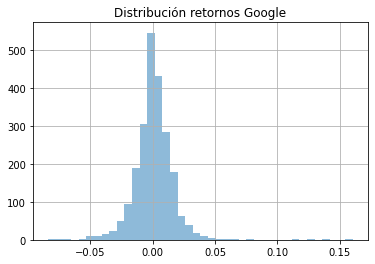

VaR 10%  (90% Confidence level):    -0.019144768159773826
VaR 5% (95% Confidence Level):    -0.024760825795677698
VaR 1% (99% Confidence Level):    -0.035295615924227225


In [129]:
#Calculo del VaR para un solo activo

#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import fix_yahoo_finance as yf

#Descargamos la data para la acción de Google en las siguientes fechas
df = yf.download('GOOG', '2010-01-01','2019-01-31')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
#Conservamos solo el precio de cierre
df = df[['Close']]
print(df.head(3))

#Calculamos los retornos
df['returns'] = df.Close.pct_change()

# Usamos numpy para calcular el retorno diario esperado
mean = np.mean(df['returns'])
#Usamos numpy para calcular desviación estandar de los retornos diarios
std_dev = np.std(df['returns'])
df['returns'].hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title("Distribución retornos Google")
plt.show()

#Calculamos el VaR con el inverso de la función
# de densidad acumulada normal usando el metodo
# ppf() "percentil point function"
VaR_10 = norm.ppf(1-0.9, mean, std_dev)
VaR_5 = norm.ppf(1-0.95, mean, std_dev)
VaR_1 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 10%  (90% Confidence level):   ', VaR_10)
print('VaR 5% (95% Confidence Level):   ', VaR_5)
print('VaR 1% (99% Confidence Level):   ', VaR_1)


El ejemplo calcula el VaR a un día, cómo podemos extender el resultado a un periodo de tiempo más amplio partiendo de los retornos diarios? Asuma un portafolio con valor de 30 millones.


Esto podemos lograrlo multiplicando el VaR a un día por la raíz cuadrada del número de días que queremos extenderlo

5 dia VaR @ 5%: 1.66
10 dia VaR @ 5%: 2.35
15 dia VaR @ 5%: 2.88
20 dia VaR @ 5%: 3.32
25 dia VaR @ 5%: 3.71
30 dia VaR @ 5%: 4.07


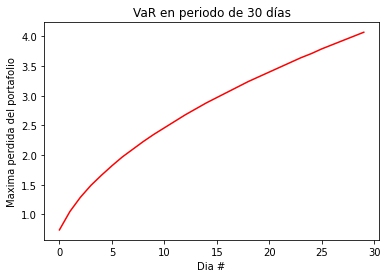

In [130]:
# Calcular el VaR n-dias
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    z=var_array.append(np.round(VaR_5 * np.sqrt(x)*-1*30,2))
    if x%5==0:
      print(str(x) + " dia VaR @ 5%: " + str(np.round(VaR_5 * np.sqrt(x)*-1*30,2)))

# Gráfica
plt.xlabel("Dia #")
plt.ylabel("Maxima perdida del portafolio")
plt.title( "VaR en periodo de 30 días")
plt.plot(var_array, "r")

### Ejercicio 2

Partiendo desde la misma fecha inicial del ejercicio anterior, añada información de la acción de Google hasta el día de ayer. Luego calcule el VaR 1% , VaR 5% y VaR 10%. Ha aumentado el riesgo del activo al incluir las observaciones de este año?


In [ ]:
#Desarrolle aqui su ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import fix_yahoo_finance as yf

#Descargamos la data para la acción de Google en las siguientes fechas
df = yf.download('GOOG', '2010-01-01','2020-09-17')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
#Conservamos solo el precio de cierre
df = df[['Close']]
print(df.head(3))

#Calculamos los retornos
df['returns'] = df.Close.pct_change()

# Usamos numpy para calcular el retorno diario esperado
mean = np.mean(df['returns'])
#Usamos numpy para calcular desviación estandar de los retornos diarios
std_dev = np.std(df['returns'])
df['returns'].hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title("Distribución retornos Google")
plt.show()

#Calculamos el VaR con el inverso de la función
# de densidad acumulada normal usando el metodo
# ppf() "percentil point function"
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 10%  (90% Confidence level):   ', VaR_90)
print('VaR 5% (95% Confidence Level):   ', VaR_95)
print('VaR 1% (99% Confidence Level):   ', VaR_99)

--->

### Ejercicio 3

Asuma un portafolio con retorno esperado de 0.0384% y una desviación estandar de 0.9960%, cuál de los siguientes valores se aproxima mas a un VaR del 1% para un portafolio de 300 millones de COP.

a) 6.8 millones COP

b) 4.8 millones COP

c) 2.8 millones COP


In [ ]:
#Desarrolle aqui su ejercicio


### 1.4. VaR histórico (No paramétrico)

Simulemos a partir de una distribución normal los retornos de 10 activos hipotéticos



Text(0, 0.5, 'Retorno')

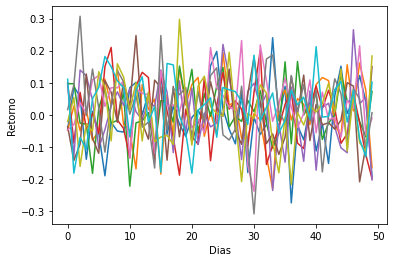

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# mu = 0.01, std = 0.10, 1000 dias, 10 activos
mu = 0.01
sigma = 0.10
dias = 1000
num_assets = 10

returns = np.random.normal(mu, sigma, (dias, num_assets))

# Nombres Hipoteticos
names = ['Asset %s' %i  for i in range(num_assets)]

# Metemos los retornos en un dataframe
returns = pd.DataFrame(returns, columns=names)

# Grafica de los 50 primeros dias
plt.plot(returns.head(50))
plt.xlabel('Dias')
plt.ylabel('Retorno')

In [ ]:
weights = np.ones((10, 1))
# Normalizamos los pesos
weights = weights / np.sum(weights)

def value_at_risk(value_invested, returns, weights, alpha=0.05, lookback_days=520):
    returns = returns.fillna(0.0)
    # Multiplicamos los retornos en la ventana seleccionada por los pesos para obtener un retorno ponderado
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # Buscamos el percentil adecuado en el vector de retornos y lo multiplicamos por el valor invertido
    return np.percentile(portfolio_returns, 100 * (alpha)) * value_invested

Calculemos el VaR para $\alpha = 0.05$.

In [ ]:
value_invested = 1000000

value_at_risk(value_invested, returns, weights, alpha=0.05)

-41371.2104213638

Interpretamos este resultado como:  históricamente no más del 5% de los dias resultaron en pérdidas más extremas que este valor.

### 1.5. Conditional Value at Risk (CVaR): ¿Qué pasa si los retornos no son normales?

El CVaR es considerado como una mejora del VaR, ya que toma en cuenta la forma de la distribución de los retornos. También se le conoce como Expected Shortfall, y no es otra cosa que el valor esperado de todas las diferentes pérdidas mayores al VaR.

### Valor esperado (Repaso)

Suponga un dado justo. Cada número es igual de probable. El concepto de valor esperado escrito como $\mathrm{E}(X)$, hace referencia al valor que se obtendría al considerar todos los eventos posibles. Para obtenerlo solo basta multiplicar cada evento por su probabilidad de ocurrencia y luego sumar estos valores,  es decir, estamos ponderando probabilidades:

$$1/6 \times 1 + 1/6 \times 2 + 1/6 \times 3 + 1/6 \times 4 + 1/6 \times 5 + 1/6 \times 6 =  3.5$$

Cuando los posibles resultados son continuos utilizamos la integración. Esta sería la formula del CVar:

$$CVaR_{\alpha}(x) \approx \frac{1}{(1-\alpha)} \int_{f(x,y) \geq VaR_{\alpha}(x)} f(x,y)p(y)dy dx$$

In [ ]:
def cvar(value_invested, returns, weights, alpha=0.05, lookback_days=520):
    # LLamamos a nuestra función de VaR basico
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    # Encontramos un ratio en lugar de una perdida monetaria
    var_pct_loss = var / value_invested
    
    #Promediamos luego los retornos menores al var_pct_loss
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

Comparemos los cálculos para nuestro ejercicio anterior

In [ ]:
cvar(value_invested, returns, weights, lookback_days=500)

-54563.57265141859

In [ ]:
value_at_risk(value_invested, returns, weights, lookback_days=500)

-39084.95469507134

El CVaR es mayor porque captura mas información acerca de la forma de la distribución (momentos). Si las colas tienen más masa va a capturar ese fenómeno



# 2.0 Backtesting de  estrategias de Trading
<p><a name="backtesting"></a></p>

[[Contenidos]](#contents)

Podemos definir al Backtesting como el método general para ver que tan bien se desempeña una estrategia o modelo desde una perspectiva ex-post. El Backtesting permite ademas valorar la viabilidad de una estrategia de trading al descubrir cómo le hubiese ido usando data histórica. Si un  backtesting funciona, los traders y analistas pueden tener  confianza para implementar la estrategia  analizada.


## 2.1 Death Cross and Golden Cross 

<p><img alt="comparison  logo" width="450" height="280" src="https://www.investopedia.com/thmb/LilaVqIIg0eWGiqKbj6Bf9pYcss=/1575x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/2018-12-14-DeathCross-5c13eaf0c9e77c00013499e4.png"
" align="center" hspace="10px" vspace="0px"></p>

Un "Death Cross" occurre cuando la media móvil de 50 días de un indice o acción cae por debajo de su media móvil de 200 días, esto suele conllevar un retroceso en la tendencia de largo plazo para el activo. Veamos un ejemplo de como evaluar una estrategia de trading basada en esta señal para invertir.



In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import fix_yahoo_finance as yf

#Descargamos la data del SP500 utilizando Yahoo Finance las siguientes fechas
spy = yf.download('^GSPC', '2007-01-01','2020-09-14')

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
#Tomamos solamente el precio de cierre
spy=spy[["Close"]]

# Calculamos diferentes medias moviles para el SPX 
spy["ma_50"]=spy.Close.rolling(window=50).mean()
spy["ma_200"]=spy.Close.rolling(window=200).mean()



#Usamos plotly para graficar nuestras series
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Scatter(x=spy.index, y=spy.Close,
                    name='SP500'))
fig.add_trace(go.Scatter(x=spy.index, y=spy.ma_50,
                      name='MA 50'))
fig.add_trace(go.Scatter(x=spy.index, y=spy.ma_200,
                      name='MA 200'))
fig.update_layout(title='SP500 - DEATH CROSS',yaxis_title="Precio")
fig.show()


In [ ]:
#Eliminamos aquellas fechas con NaN
spy=spy.dropna()

#Creamos nuestra señal para el death crossing
# con la siguiente interpretación:
# Signal= 1 , Long Position, Expuestos de forma positiva y directa al activo
# Signal= -1, Short Position, Expuestas de forma negativa al activo


spy['Signal'] = spy.apply(lambda row: 1 if row['ma_50'] > row['ma_200']  else -1, axis=1)

#Calculamos el retorno del SP500  
spy["return"]=spy.Close.pct_change()
# Calculamos el retorno acumulado de nuestra linea base: Buy And Hold
spy["BuyAndHold"]=spy["return"].cumsum()

#Calculamos el retorno acumulado de nuestra estrategia Long-Short con el death crossing
spy["Strategy"]=spy["return"]*spy["Signal"]
spy["Strategy_cum"]=spy["Strategy"].cumsum()


In [ ]:
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=spy.index, y=spy.BuyAndHold,
                    name='Buy And Hold'))
fig.add_trace(go.Scatter(x=spy.index, y=spy.Strategy_cum,
                      name='Strategy'))
fig.update_layout(title='Desempeño Estrategia',yaxis_title="Retorno Acumulado")

fig.show()

Veamos unas metricas que nos permitan comparar la estrategia contra un enfoque de Buy And Hold en el mismo periodo de tiempo:



In [ ]:
metricas={}
label={"Strategy":"Strategy","return":"BuyAndHold"}
idx=['volatilidad','Retorno Mensual Promedio',"Ratio Sharpe",'% meses +','+/- ratios meses','trades positivos %',
     'trades negativos %']

for metodo in spy[["Strategy","return"]].columns:
  #Volatilidad Anualizada de la Estrategia
  vol=np.round(spy[metodo].std()*np.sqrt(252)*100,2)
  #Retorno Mensual Promedio de la Estrategia
  avgret=np.round(spy[metodo].groupby(spy.index.strftime('%Y-%m')).sum().mean()*100,2)
  #Ratio de Sharpe
  sharpe=np.round((spy[metodo].mean()/spy[metodo].std())*np.sqrt(252),2)
  # Porcentaje de meses con retornos positivos
  posret=np.round(np.sum(spy[metodo].groupby(spy.index.strftime('%Y-%m')).sum()>0)/
                  len(spy[metodo].groupby(spy.index.strftime('%Y-%m')).sum()),2)
  # Ratio de meses positivos/ meses negativos
  pnratio=np.round(posret/(100-posret),3)
  #trades positivos
  trades_pos=np.round(len(spy.loc[spy[metodo]>0])/len(spy[metodo]),3)
  #trades negativos
  trades_neg=np.round(len(spy.loc[spy[metodo]<0])/len(spy[metodo]),3)

  metricas[label[metodo]]=[vol,avgret,sharpe,posret,pnratio,trades_pos,trades_neg]
dfm=pd.DataFrame(metricas)
dfm["metrica"]=idx


In [ ]:
dfm

,Strategy,BuyAndHold,metrica
0,21.200,21.200,volatilidad
1,0.290,0.840,Retorno Mensual Promedio
2,0.170,0.480,Ratio Sharpe
3,0.620,0.660,% meses +
4,0.006,0.007,+/- ratios meses
5,0.528,0.549,trades positivos %
6,0.471,0.450,trades negativos %


## 2.2 Otras Estrategias (Motivación)

Las siguientes son algunas estrategias famosas utilizadas en algunos contextos:

+ Estrategia de la cinta (Ribbon)

<p><img alt="comparison  logo" width="450" height="280" src="https://www.investopedia.com/thmb/sb8EcM5zIYn6dCfvWncE8ZhUWS4=/860x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/riboon_strategy-5bfd867a46e0fb00264a294c"
" align="center" hspace="10px" vspace="0px"></p>

+ MACD

<p><img alt="comparison  logo" width="450" height="280" src="https://www.investopedia.com/thmb/gVYBIpfqqQCZxWG1gSyO2TrT294=/856x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/macd_crossover_strategy_1-5bfd867746e0fb0051bb0cf4"
" align="center" hspace="10px" vspace="0px"></p>





### Ejercicio 4

Escoja un periodo de tiempo distinto en el cual probar si la estrategia del death Cross arroja resutados distintos al compararlo contra el BuyAndHold. Muestre la gráfica de retornos acumulados además de la tabla resumen de métricas




In [ ]:
#Desarrolle aqui su ejercicio

<p><a name="interes"></a></p>

# 3.0 Modelos de Tasas de Interés

[[Contenidos]](#contents)

A la hora de implementar estrategias en portafolios con activos de renta fija (Deuda Privada, Deuda Pública, Treasuries Americanos, Bunds Alemanes, etc..) hay dos actividades fundamentales que debe realizar: La primera es determinar si los bonos vendidos o comprados estan siendo valorados a un precio justo, la segunda, determinar el desempeño de su portafolio bajo distintos escenarios de tasas de interés. Para ambas actividades se hace útil la aplicación de modelos de tasas de interés.

Los modelos de tasas de interés son una descripción estadistica de como las tasas pueden cambiar en el tiempo


## 3.1. Un proceso estocástico de tiempo continuo básico

Empecemos con un modelo básico para la tasa de interés de corto plazo $r$ utilizando la siguiente especificación:

$$dr=b\cdot dt+\sigma \cdot dz $$

Donde:
+ $r$ : Representa la tasa de interés de corto plazo, por tanto $dr$ denota sus cambios
+ $dz$ : denota un proceso aleatorio
+ $\sigma$ : desviación estándar de los cambios en la tasa de corto plazo (término de volatilidad)
+ $b$ : Dirección esperada del cambio en la tasa (drift)

Antes de continuar la formulación anterior requiere enunciar 3 supuestos:

+ La variable $z$ sigue una distribución normal de media cero y desviación estándar de 1.
+ El cambio en $r$ es proporcional al valor del término de volatilidad.
+ Los cambios de $r$ entre dos periodos de tiempo son independientes

Podemos mejorar nuestro modelo básico al incorporar cierta racionalidad economica al cambiar las dinámicas de nuestros parametros haciendolos depender del nivel de $r$ como también del tiempo. Así nuestro modelo pasaria a ser:

$$dr=b(r,t)\cdot dt+\sigma(r,t) \cdot dz $$



## 3.2. Especificando la dinámica del drift

Vamos a definir el drift como un proceso de **reversión a la media**, es decir, asumimos un valor promedio estable de largo plazo $\bar{r}$ . De esta forma si $r > \bar{r}$  la dirección del cambio va a moverse hacia $\bar{r}$ y viceversa.  El parametro  $\alpha$ corresponde así  a la **velocidad de ajuste** a la que $r$ converge a $\bar{r}$
 
$$b(r,t)=-\alpha (r- \bar{r})$$

## 3.3. Especificando la dinámica del término de volatilidad

Hay tres especificaciones bastante usadas por la literatura:

+ Especificación de Vasicek: $\sigma(r,t)=\sigma$
+ Especificación de Dothan: $\sigma(r,t)=\sigma r$
+ Especificación de Cox-Ingersoll-Ross (CIR): $\sigma(r,t)=\sigma \sqrt{r}$


De esta forma un modelo CIR completo puede escribirse

$$dr= -\alpha (r- \bar{r})dt+\sigma \sqrt{r}dz$$

## 3.4 Aplicaciones

Los bonos de renta fija suelen dividirse en bonos con cupón y bonos de cupón cero. Los primeros identifican aquellos documentos mediante los cuales el emisor se compromete a pagar al inversionista o tenedor del mismo una suma fija, denominada cupón, en los períodos señalados en el prospecto de emisión del título y un valor final, denominado principal o valor facial , al momento del vencimiento.

 Los bonos de cupón cero, por su parte, identifican aquellos
títulos mediante los cuales se pacta un solo pago final sin ningún pago periódico intermedio.

El plazo de maduración (term to maturity) es el número de años en los cuales el
emisor del bono promete realizar los pagos pactados incluyendo el correspondiente al principal. De esta manera, el plazo de maduración identifica la fecha en la cual desaparecen las obligaciones del emisor.

El precio de un bono es igual al valor presente del flujo de caja esperado. Esto
implica la necesidad de calcular un rendimiento requerido, el cual refleja el rendimiento de instrumentos financieros de riesgo similar o de inversiones alternativas.

La estructura a plazo de la tasa de interés es la relación entre los rendimientos de
títulos con similar calidad crediticia, regularmente libres de riesgo, pero con diferente
período de maduración. La representación gráfica de la estructura a plazo de las tasas de
interés se conoce como curva de rendimientos (yield curve).

<p><img alt="comparison  logo" width="450" height="280" src="
https://cdn.statically.io/img/www.rgaia.com/wp-content/uploads/2016/03/22016.jpg?quality=100&f=auto"
" align="center" hspace="10px" vspace="0px"></p>



Los modelos de Vasicek y CIR son modelos de estructura a plazos de equilibrio ( Equilibrium Term Strucutre), esta asignación se da ya que son modelos que buscan describir la dinámica de la estructura a plazos de la tasa de interés usando variables económicas fundamentales para explicar el comportamiento de las tasas. Algunas característcias de estos modelos son:

+ Modelos de un único factor:  Un solo factor observable (variable estado) explica todos los movimientos de la curva.
+ Se introducen supuestos sobre el comportamiento de los factores (reversión a la media)
+ Requieren pocos parámetros para la estimación

Veamos una implementación en python para simular el proceso de Vasicek

$$dr= -\alpha (r- \bar{r})dt+\sigma dz$$


In [ ]:
#Simulación de una realización (path) de  tasas de interés usando el modelo de Vasicek
import numpy as np
def vasicek(r0, alpha, r_bar, sigma, T=1., N=10, seed=123):
  np.random.seed(seed)
  dt = T/float(N)
  rates = [r0]
  for i in range(N):
    #Calculamos dr con la especificación de Vasicek
    dr = -alpha*(rates[-1]-r_bar)*dt + sigma*np.random.normal()

    rates.append(rates[-1] + dr)
    
  return range(N+1), rates

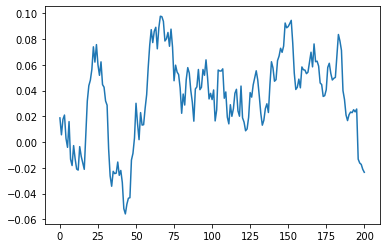

In [ ]:
#Hagamos uns simulacion con los siguientes parametros
# r_0=0.01875
# alpha= 0.2
# r_bar=0.01
# sigma=0.012
# Numero de periodos=200

import matplotlib.pyplot as plt
x, y = vasicek(0.01875, 0.20, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

Observe que el modelo de Vasicek permite tener tasas de interés negativas

### Ejercicio 5

Grafique primero una simulación de Vasicek con una velocidad de ajuste cercana a 1 y luego una con un velocidad de ajuste cercana a 0 con todos los demás parámetros iguales

Interprete los resultados


In [ ]:
#Desarrolle aqui su ejercicio

### Ejercicio 6

Basandose en el codigo del modelo de Vasicek defina una función para el modelo CIR

$$dr= -\alpha (r- \bar{r})dt+\sigma \sqrt{r}dz$$

In [131]:
#Desarrolle aqui su ejercicio



De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

#Simulación de una realización (path) de  tasas de interés usando el modelo de Vasicek
import numpy as np
import math

def cir(r0, alpha, r_bar, sigma, T=1., N=10, seed=123):
  np.random.seed(seed)
  dt = T/float(N)
  rates = [r0]
  for i in range(N):
    #Calculamos dr con la especificación de Vasicek
    dr = -alpha*(rates[-1]-r_bar)*dt + sigma*math.sqrt(rates[-1])*np.random.normal()

    rates.append(rates[-1] + dr)
    
  return range(N+1), rates

--->

### Ejercicio 7

Grafique su función del modelo CIR con los siguientes parametros

$$cir(r_0=0.01875,\alpha= 0.20, \bar{r}=0.01, \sigma=0.012, T=10., N=200)$$

In [ ]:
#Desarrolle aqui su ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

import matplotlib.pyplot as plt
x, y = cir(0.01875, 0.20, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

--->

Construyamos ahora una estimación de la estructura a plazos de la tasa de interés

In [133]:
import numpy as np
#Valoracion de un bono cero cupon utilizando Vasicek
def zcb(r_bar, alpha, sigma, tau, r0=0.):
  B = (1 - np.exp(-alpha*tau)) / alpha
  A = np.exp((r_bar-(sigma**2)/(2*(alpha**2))) *(B-tau) - (sigma**2)/(4*alpha)*(B**2))
  return A * np.exp(-r0*B)



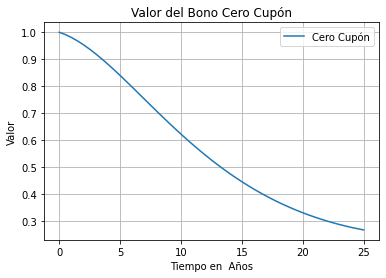

In [134]:
Ts = np.r_[0.0:25.5:0.5] #Concatenación de arrays en el primer indice

zcbs = [zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

import matplotlib.pyplot as plt
plt.title("Valor del Bono Cero Cupón")
plt.plot(Ts, zcbs, label='Cero Cupón')
plt.ylabel("Valor")
plt.xlabel("Tiempo en  Años")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


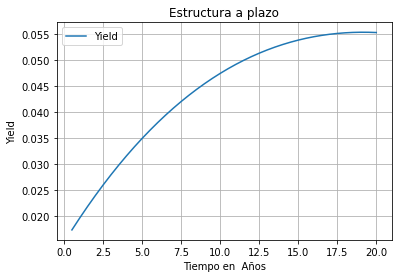

In [135]:
# extraemos la yield con la funcion yield
def  yieldc(r_bar, alpha, sigma, tau, r0=0.):
  B = (1 - np.exp(-alpha*tau)) / alpha
  A = np.exp((r_bar-(sigma**2)/(2*(alpha**2))) *(B-tau) - (sigma**2)/(4*alpha)*(B**2))
  return -1*math.log(A * np.exp(-r0*B))

Ts = np.r_[0.0:20.5:0.5]

yields = [yieldc(0.5, 0.02, 0.03, t, 0.015)/t for t in Ts]

import matplotlib.pyplot as plt
plt.title("Estructura a plazo")
plt.plot(Ts, yields, label='Yield')
plt.ylabel("Yield")
plt.xlabel("Tiempo en  Años")
plt.legend()
plt.grid(True)
plt.show()

# 4.0  Riesgo de Concentración de Posiciones
<p><a name="risk"></a></p>
No sobra recalcar la importancia de diversificar los riesgos al momento de tomar decisiones de inversión. Al concentrar sus posiciones en solo unos pocos activos podria impactarse negativamente el portafolio como un todo.

En esta sección vamos a ver como la diversificación ayuda  a reducir el riesgo total en un portafolio. 

Un principio básico de la construcción de portafolios es la búsqueda de apuestas independientes, es decir, la toma de posiciones en activos no correlacionados. Recordemos que la voltilidad suele ser medida como la desviación estándar de la serie de retornos y que el riesgo de un portafolio suele entenderse como la volatilidad pasada del portafolio.


## 4.1: Inversión en un solo activo

Simulemos un conjunto de activos a partir de una distribución normal
.

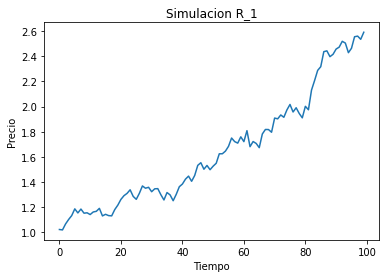

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Array de retornos , 100 observaciones
R_1 = np.random.normal(1.01, 0.03, 100)
#Array de retornos geometricos acumulados (Precio)
A_1 = np.cumprod(R_1)
P = A_1
plt.plot(P)
plt.title("Simulacion R_1")
plt.xlabel('Tiempo')
plt.ylabel('Precio');

En este caso estamos completamente expuestos al comportamiento del activo

## 4.2.: Inversión en varios activos correlacionados entre sí

Aunque para este caso ya aumentamos nuestro universo de activos, aún existe una correlación no despreciable entre los retornos. Para simular esta correlación hacemos que los activos desde 2 hasta N sean: el activo 1 + ruido.

Volatilidades Individuales
[0.0316, 0.0333, 0.0327, 0.0333, 0.0327, 0.0332, 0.0337, 0.0325, 0.0327, 0.033]
--------------------------
Volatilidad promedio de los activos
0.032869999999999996
--------------------------
Volatilidad del Portafolio
0.0316


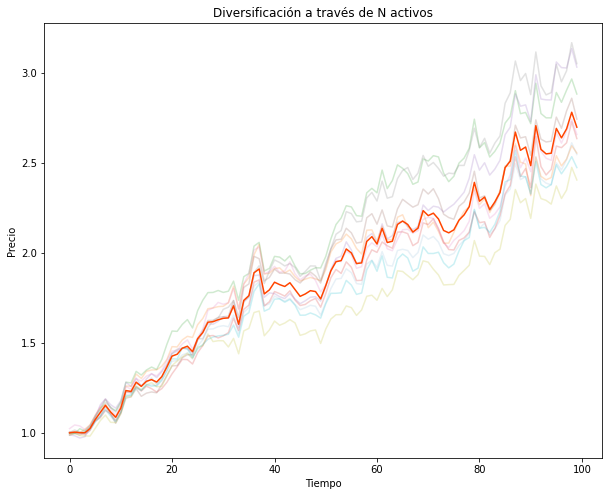

In [136]:
# N indica el numero de activos en nuestro portafolio
N = 10

#Generamos un array de zeros para 10 Activos y 100 Observaciones
# tanto para los retornos como para los precios
returns = np.zeros((N, 100))
assets = np.zeros((N, 100))

#Simulamos los retornos del activo 1 a partir de una simulación
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
fig=plt.figure(figsize=(10,8))
plt.plot(assets[0], alpha=0.1)

# Con un ciclo comenzamos a generar los  retornos
# de los demas activos
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.01, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha=0.22)

#Calculamos la senda del retorno promedio de N activos
# En este caso el retorno promedio coincide con 
# el retorno del portafolio porque son equiponderados w= 1/N
R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)



plt.plot(P,color="orangered")
plt.xlabel('Tiempo')

plt.title("Diversificación a través de N activos")
plt.ylabel('Precio');

print ('Volatilidades Individuales')
print([np.round(np.std(R),4) for R in returns])
print("--------------------------")
print ('Volatilidad promedio de los activos')
print (np.mean([np.round(np.std(R),4) for R in returns]))
print("--------------------------")
print ('Volatilidad del Portafolio')
print (np.round(np.std(R_P),4))

## 4.3.  Inversión en varios activos no correlacionados

En este caso generamos los activos de manera independiente

Volatilidades Individuales
[0.0296, 0.0282, 0.0248, 0.0303, 0.0266, 0.0289, 0.0296, 0.0296, 0.0315, 0.0285]
--------------------------
Volatilidad promedio de los activos
0.02876
--------------------------
Volatilidad del Portafolio
0.0102


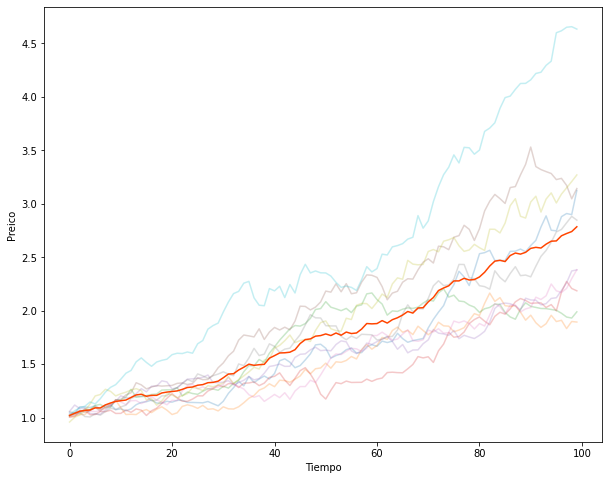

In [30]:
#N representa el número de activos
N = 10

#Creamos los arrays de los retornos y los precios
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

#Con este ciclo generamos de forma independiente los N activos
fig=plt.figure(figsize=(10,8))
for i in range(N):
    R_i = np.random.normal(1.01, 0.03, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha=0.25)

#Calculamos la senda del retorno promedio de N activos
# En este caso el retorno promedio coincide con 
# el retorno del portafolio porque son equiponderados w= 1/N
R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)
plt.plot(P,color="orangered")
plt.xlabel('Tiempo')
plt.ylabel('Precio')


print ('Volatilidades Individuales')
print([np.round(np.std(R),4) for R in returns])
print("--------------------------")
print ('Volatilidad promedio de los activos')
print (np.mean([np.round(np.std(R),4) for R in returns]))
print("--------------------------")
print ('Volatilidad del Portafolio')
print (np.round(np.std(R_P),4))




Analicemos este resultado. Poseer más activos no correlacionados suaviza el comportamiento de nuestro portafolio. Cuando un activo sube,  son menos propensos a subir también, así los comovimientos en un mismo sentido son menos probables. Además, entre más activos poseamos más vamos a reducir la volatilidad. Veamos cómo:

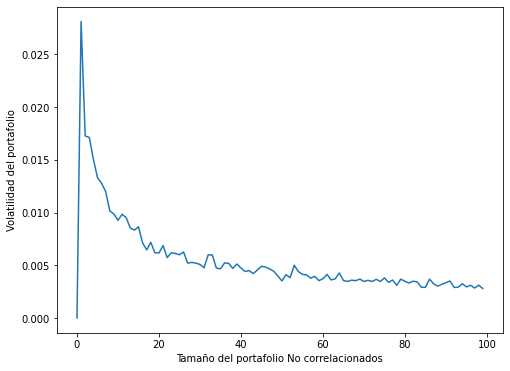

In [32]:
#Creamos un array para almacenar las volatilidades
portfolio_volatilities_by_size = np.zeros((100,1))

#Iteramos por tamaño del portafolio: con un activo,
# con dos activos, así hasta un portafolio de 100 activos
for N in range(1,100):

    assets = np.zeros((N, 100))
    returns = np.zeros((N, 100))

    for i in range(N):
        R_i = np.random.normal(1.01, 0.03, 100)
        returns[i] = R_i

    R_P = np.mean(returns, axis=0)

    portfolio_volatilities_by_size[N] = np.std(R_P)
fig=plt.figure(figsize=(8,6))    
plt.plot(portfolio_volatilities_by_size)
plt.xlabel('Tamaño del portafolio No correlacionados')
plt.ylabel('Volatilidad del portafolio');

## Algunas Restricciones en la vida real

Debido a los costos de transacción se hace imposible llevar el concepto de diversificación más allá de unos cientos de activos.


## Matemática Detrás (Opcional)

Podemos extender la idea de un portafolio compuesto por
 $n$ activos relativamente simple. Aquí tenemos la forma general de la varianza de un portafolio con $n$ activos:

$$ \sigma_p^2 = \sum_i \omega_i^2 \sigma_i^2 + \sum_i\sum_{j\neq i} \omega_i\omega_j\sigma_i\sigma_j\rho_{ij}, \ i, j \in \lbrace 1,\ldots, n\rbrace $$

Que podemos expresar en un forma matricial como:

$$ \sigma_p^2 = w^{T}\Sigma w $$


Cuando dos activos son independientes su correlación es $\rho_{ij}=0$.

## Ejercicio 8

Seleccione al menos 2 de los siguientes fondos mutuos para construir un portafolio equiponderado vigente desde el primero de enero de 2017 a la fecha de ayer. 

+ "DVEM": WisdomTree Emerging Markets ESG Fund

+ "ICVT": iShares Convertible Bond ETF

+ "JHMI": John Hancock Multifactor Industrials ETF

+ "PSCH": Invesco S&P SmallCap Health Care ETF

+ "ASHR": Xtrackers Harvest CSI 300 China A-Shares ETF

+ "IAU": iShares Gold Trust

+ "IHY": VanEck Vectors International High Yield Bond ETF

Calcule la volatilidad de cada uno de los activos seleccionados, la volatilidad promedio de sus activos y la volatilidad del portafolio construido.

Finalmente grafique la rentabilidad acumulada geométrica de su portafolio propuesto contra el SP500


In [79]:
# Pista 1
# Como importar los precios de cierre de yahoo finance para varios tickers

#librerias a importar
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
yf.pdr_override() 

#Tickers deseados
tickers=["SPY", "AAPL", "MSFT"]
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2012,5,31)
end = datetime.datetime(2018,3,1)

#Conexion a yahoo finance
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]
df_precios.head()


[*********************100%***********************]  3 of 3 downloaded


,SPY_Close,AAPL_Close,MSFT_Close
Date,,,
2012-05-31,131.470001,20.633215,29.190001
2012-06-01,128.160004,20.035357,28.450001
2012-06-04,128.100006,20.153214,28.549999
2012-06-05,129.070007,20.101072,28.510000
2012-06-06,131.970001,20.409286,29.350000


In [92]:
#Desarrolle aqui su ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

#librerias a importar
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
yf.pdr_override() 

#Tickers deseados
tickers=["DVEM","ICVT","JHMI","PSCH","ASHR","IAU","IHY","SPY"]
column_precio=[i+"_Close" for i in tickers]

start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,9,17)
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')
df.columns = ['_'.join(col) for col in df.columns]
df_precios=df[column_precio]

df_retornos=df_precios.pct_change().dropna()
df_retornos["retorno_port"]=df_retornos[["DVEM_Close","ICVT_Close","JHMI_Close","PSCH_Close","ASHR_Close","IAU_Close","IHY_Close"]].apply(np.mean,axis=1)
print ('Volatilidades')
print(df_retornos.std())
print("--------------------------")
print ('Volatilidad promedio de los activos')
print (df_retornos.iloc[:,:-1].std().mean())

df_retornos["retorno_port_cum"]=df_retornos["retorno_port"]+1
df_retornos["retorno_port_cumg"]=df_retornos["retorno_port_cum"].cumprod()
df_retornos["SPY_cum"]=df_retornos["SPY_Close"]+1
df_retornos["SPY_cumg"]=df_retornos["SPY_cum"].cumprod()

######### GRAFICAS #########
fig=plt.figure(figsize=(10,8))
plt.plot(df_retornos.SPY_cumg,color="orangered",label='SP500')
plt.plot(df_retornos.retorno_port_cumg,label='Portafolio')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Retorno')



--->

# 5.0 Beta Hedging
<p><a name="beta"></a></p>

[[Contenidos]](#contents)

## 5.1 Factor Models

Los Factor models (modelos de factores) son una técnica que permiten explicar los retornos de un activo como la combinación lineal de los retornos de otros activos. La forma general de un modelo de factores es 

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$$

La cual se parece a la especificación de una regresión lineal múltiple. 

### ¿Qué es la Beta?

La beta de un activo no es otra cosa que el coeficiente respectivo enunciado en la formulación anterior. Por ejemplo si hicieramos la regresión de AMZN contra el  S&P 500 usando el modelo  $Y_{AMZN} = \alpha + \beta X$ , entonces la exposición de  AMZN  contra el S&P 500 sería esa beta. Por otro lado, si usaramos el modelo  $Y_{AMZN} = \alpha + \beta_{1} X_{SPY} + \beta_{2} X_{AAPL}$, tendriamos 2 betas, una de exposición al S&P 500 y otra que sería la exposición de AMZN a  AAPL.



In [99]:
# Importamos las librerias necesarias
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
yf.pdr_override() 


[*********************100%***********************]  2 of 2 downloaded


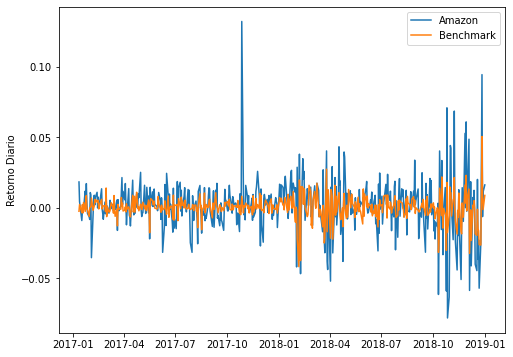

In [122]:
# conseguimos la data necesaria


#Tickers deseados
tickers=["SPY", "AMZN"]
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2017,1,11)
end = datetime.datetime(2019,1,1)

#Conexion a yahoo finance
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]

asset=df_precios[["AMZN_Close"]]
benchmark=df_precios[["SPY_Close"]]



# Calculamos los retornos
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

# Grafiquemos
fig=plt.figure(figsize=(8,6))  
plt.plot(r_a,label="Amazon")
plt.plot(r_b,label="Benchmark")
plt.ylabel("Retorno Diario")
plt.legend();

Hagamos ahora la regresión para encontrar $\alpha$ y $\beta$:

In [123]:
# Definamos las variables de forma similar a la formulacion de regresión
X = r_b.values # Toammos los valores ignorando las fehcas
Y = r_a.values

def linreg(x,y):
    
    # Añadimos una constante
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))

alpha: 0.001090320254210506
beta: 1.5731148412935139


Veamos que al graficar $\alpha + \beta X$, podemos ver la relación con la linea de mejor estimación:

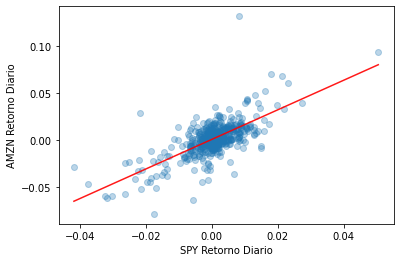

In [124]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("SPY Retorno Diario")
plt.ylabel("AMZN Retorno Diario")

 # Añadimos una linea roja de mejor ajuste
plt.plot(X2, Y_hat, 'r', alpha=0.9);

## 5.2. Exposición a Riesgo 

En un plano más general, esta beta se interpreta como la medición de exposición a riesgo tomado al mantener una posición en el activo.

Si un activo tiene una alta exposición en términos de beta al  S&P 500, entonces va a irle muy bien en las subidas del mercado pero va a tener desempeño pobre cuando este vaya a la baja.  Una beta alta corresponde a un riesgo especulativo alto.




### Hedging (Cobertura)

Si determinamos que los retornos de nuestro portafolio dependen del mercado via esta relación:

$$Y_{portfolio} = \alpha + \beta X_{SPY}$$

podemos tomar una posición corta en SPY  con el objetivo de cancelar este riesgo. La cantidad a tomar sería  $-\beta V$ donde $V$ es el valor total de nuestro portafolio.

Esta estrategia funciona si nuestros retornos pueden aproximarse con $\alpha + \beta X_{SPY}$, luego añadiendo un corto en SPY  hará que nuestros retornos sean  $\alpha + \beta X_{SPY} - \beta X_{SPY} = \alpha$. Así, nuestros retornos serán puramente alfa (en promedio), el cual es independiente del SPY y no está expuesto al mercado.

### Market Neutral

Cuando una estrategia tiene beta de 0 se denomina market neutral.


### Advertencias

+ La beta puede cambiar en el tiempo

+ Violaciones de supuestos OLS 





## 5.3. Implementando el Hedging

Ahora que identificamos el hedge, veamos como afectaría a nuestros retornos. Construiremos un portafolio usando el activo y el benchmark, ponderando el  benchmark con  $-\beta$ (negativo ya que es una posición en corto).

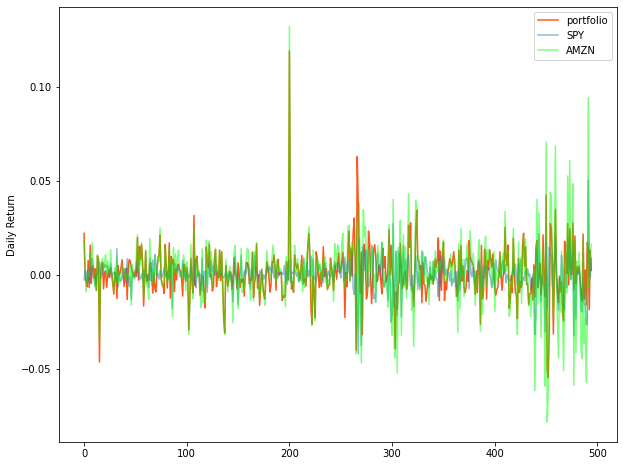

In [125]:
# Construccion de un portaolfio con cobertura de Beta
portfolio = -1*beta*r_b.values + r_a.values

# Grafico de los retornos
fig=plt.figure(figsize=(10,8))  
plt.plot(portfolio,alpha=0.9,label="portfolio",color="orangered")
#portfolio.plot(alpha=0.9)
plt.plot(r_b.values,alpha=0.5,label="SPY")
plt.plot(r_a.values,alpha=0.5,label="AMZN",color="lime")
#r_b.plot(alpha=0.5);
#r_a.plot(alpha=0.5);
plt.ylabel("Daily Return")
plt.legend();

Calculemos las diferencias entre los desempeños al calcular retornos medios y volatilidades:

In [126]:
print ("retornos promedio: ", portfolio.mean(), np.mean(r_a.values))
print ("Volatilidades: ", np.std(portfolio), np.std(r_a.values))

retornos promedio:  0.0010903202542105065 0.0014483045608381945
Volatilidades:  0.013367516148543498 0.018626616884450175


Los resultados muestran que reducimos la volatilidad  a costa de retornos. Veamos que la beta de nuestro portafolio ha sido eliminada:

In [127]:
P = portfolio
alpha, beta = linreg(X,P)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(np.round(beta,4)))

alpha: 0.0010903202542105071
beta: -0.0


Luego de desarrollar nuestro hedging, veamos si la estrategia se mantiene out of sample

## Ejercicio  9 

Evalue la validez de la estrategia out of sample para lo que va de 2020 calculando retornos promedio y volatilidad, utilizando AMZN y el SPY. Para eso calcule los nuevos retornos pero construya 
el portafolio neutral a mercado utilizando la beta calculada en la sección (beta_historica=1.5731148412935139)



In [ ]:
#Pista 1
portfolio_out_sample = -1*historical_beta*r_b_out_sample.values + r_a_out_sample.values



## Tradeoff Alpha/beta 

Cubrirse contra un benchmark como el mercado tiende a reducir los retornos de su portafolio cuando el mercado está bullish, sin embargo trae la ventaja de unos retornos menos volatiles. Además, este tipo de estrategias suelen fallar en el largo plazo debido a movimientos fuertes en el mercado.

